# Assignment: Flowers Recognition
## Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

## Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

## WORKFLOW :
Load Data

Split into 60 and 40 ratio.

Encode labels.

Create Model

Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)

Train the Model.

If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

Prediction should be > 85%

Evaluation Step

Prediction

## Data :

https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [2]:
!unzip /content/drive/MyDrive/flowers.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import glob
import pickle 
import cv2
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import seaborn as sb
sb.set()
from tensorflow.keras import layers
#import the necessary modules
import os
import random
import h5py
pd.set_option('display.max_rows', 5000)
from subprocess import check_output

In [21]:
# import os
# data_dir='/content/flowers'
# os.listdir(data_dir)
# #Dict={0:'Daisy',1:'Dandelion',2:'Tulip',3:'sunflower',4:'Rose'}
# filetype = '/*.jpg'
# #declare a directory object
# path = os.path.dirname(data_dir)
# os.listdir(data_dir)

In [23]:
#specify the directory and filetype
directory = '/content/flowers'
filetype = '/*.jpg'

#declare a directory object
path = os.path.dirname(directory)

In [24]:
datadir=Path('/content/flowers')
flowers = []
features = []
labels = []
for dir in datadir.iterdir():
    flowers.append(dir.name)
    print(dir.name)
    for img_path in dir.iterdir():
        if img_path.name.endswith("jpg"):
            labels.append(dir.name)
            img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (150,150))
            features.append(img_arr)

flowers
daisy
dandelion
sunflower
tulip
rose


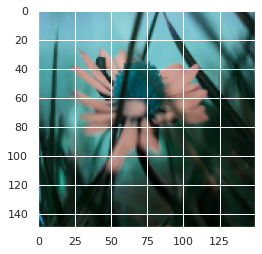

In [31]:
plt.imshow(features[20])
plt.show()


In [32]:
features = np.array(features)
labels = np.array(labels)
np.savez_compressed("flower_data", features, labels)

In [34]:
def prep(features, labels):
    features=features.reshape(len(features), 150,150,3)/255.0
    one_hot=LabelBinarizer()
    labels=one_hot.fit_transform(labels)
    return features, labels, one_hot

In [35]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
x,y,one_hot=prep(features, labels)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)

In [37]:
training_model = model.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
21/21 [==============================] - 123s 6s/step - loss: 1.8770 - accuracy: 0.2540
Epoch 2/50
21/21 [==============================] - 117s 6s/step - loss: 1.4306 - accuracy: 0.3576
Epoch 3/50
21/21 [==============================] - 116s 6s/step - loss: 1.1886 - accuracy: 0.4946
Epoch 4/50
21/21 [==============================] - 116s 5s/step - loss: 1.1275 - accuracy: 0.5341
Epoch 5/50
21/21 [==============================] - 115s 5s/step - loss: 1.0274 - accuracy: 0.5916
Epoch 6/50
21/21 [==============================] - 120s 6s/step - loss: 0.9588 - accuracy: 0.6151
Epoch 7/50
21/21 [==============================] - 116s 6s/step - loss: 0.9006 - accuracy: 0.6488
Epoch 8/50
21/21 [==============================] - 116s 6s/step - loss: 0.8001 - accuracy: 0.6868
Epoch 9/50
21/21 [==============================] - 116s 5s/step - loss: 0.7136 - accuracy: 0.7299
Epoch 10/50
21/21 [==============================] - 117s 6s/step - loss: 0.6610 - accuracy: 0.7478
Epoch 11/

In [38]:
model.save("flowersmodel.h5")

In [39]:
def plot_accuracy(training_model):
    plt.figure(figsize=(10,5))
    plt.plot(training_model.history["accuracy"], label="Accuracy", color = "b")
    plt.plot(training_model.history["loss"], label = "Loss", color = "r")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

In [42]:

model=tf.keras.models.load_model("flowersmodel.h5")

In [43]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 21s 382ms/step - loss: 3.4139 - accuracy: 0.6376


[3.4138567447662354, 0.6375722289085388]

In [44]:

model.predict(x_test)

array([[1.2557285e-06, 1.8757637e-05, 7.5400965e-09, 9.9997962e-01,
        3.4517490e-07],
       [1.2265664e-03, 6.9411731e-01, 1.5972049e-09, 1.7271584e-07,
        3.0465600e-01],
       [6.4998926e-06, 9.7438872e-01, 5.2700751e-03, 2.5664902e-05,
        2.0309011e-02],
       ...,
       [4.0632899e-06, 9.0444481e-01, 2.5366853e-07, 9.5496252e-02,
        5.4701664e-05],
       [3.8665690e-05, 9.9797529e-01, 1.0235184e-03, 5.9373071e-09,
        9.6255325e-04],
       [1.2587374e-09, 2.4039284e-10, 9.9988151e-01, 8.8701574e-07,
        1.1766571e-04]], dtype=float32)